In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import plaidml.keras
plaidml.keras.install_backend()

In [6]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
train_vals = train.iloc[:,1:].values
test_vals = test.iloc[:,1:].values

In [9]:
train_vals

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [10]:
train_vals[0].shape

(784,)

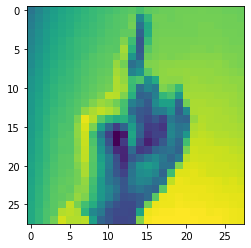

In [11]:
yes = np.reshape(train_vals[0],(28,28))
plt.imshow(yes/255)

In [12]:
X_train = train_vals
y_train = train['label']
y_train = y_train.values

X_test = test_vals
y_test = test['label']
y_test = y_test.values

In [13]:
y_train

array([ 3,  6,  2, ..., 18, 17, 23])

In [14]:
from keras.utils import to_categorical

In [15]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
print(len(X_train))
print(len(X_test))

27455
7172


In [18]:
X_train_use = []
X_test_use = []
for each in X_train:
    new = np.reshape(each,(28,28,1))
    X_train_use.append(new)
    print('done train')
for each in X_test:
    new = np.reshape(each,(28,28,1))
    X_test_use.append(new)
    print('done test')

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train
done train

done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test


done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test


done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test
done test


In [19]:
X_train_use = np.array(X_train_use)
X_test_use = np.array(X_test_use)

In [20]:
X_train_use[0].shape #yay

(28, 28, 1)

In [21]:
#DONE WITH PREPROCESSING, AND IT IS ALL STORED IN MEMORY --- YAY! NOT MAKING GENERATOR (FOR NOW)

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [23]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=25,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

INFO:plaidml:Opening device "opencl_amd_gfx803.0"


In [24]:
model.fit(X_train_use,y_train_cat,epochs=10,validation_split=0.15)

Train on 23336 samples, validate on 4119 samples
Epoch 1/10
23336/23336 [==============================] - 25s 1ms/step - loss: 1.3084 - acc: 0.5947 - val_loss: 0.2513 - val_acc: 0.9376
Epoch 2/10
23336/23336 [==============================] - 4s 192us/step - loss: 0.2656 - acc: 0.9150 - val_loss: 0.0445 - val_acc: 0.9978
Epoch 3/10
23336/23336 [==============================] - 5s 197us/step - loss: 0.1186 - acc: 0.9621 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 4/10
23336/23336 [==============================] - 5s 202us/step - loss: 0.0697 - acc: 0.9786 - val_loss: 0.0065 - val_acc: 0.9998
Epoch 5/10
23336/23336 [==============================] - 5s 204us/step - loss: 0.0547 - acc: 0.9826 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 6/10
23336/23336 [==============================] - 5s 201us/step - loss: 0.0481 - acc: 0.9841 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 7/10
23336/23336 [==============================] - 5s 207us/step - loss: 0.0352 - acc: 0.9889 - val_loss: 0.0018 - va

In [25]:
model.evaluate(X_test_use,y_test_cat)

7172/7172 [==============================] - 3s 421us/step


[0.25846611781952705, 0.9333519241494702]

In [26]:
model.save('sign_language_model.h5')

In [111]:
y_test[5]

21

array([3])

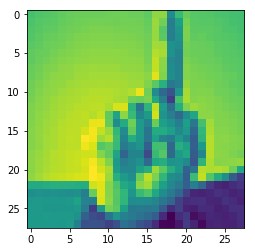

In [148]:
pic = X_test_use[4]
yes = X_test[4]
yes = np.reshape(yes,(28,28))
plt.imshow(yes)
pic = np.reshape(pic,(1,28,28,1))
model.predict_classes(pic)

1
784


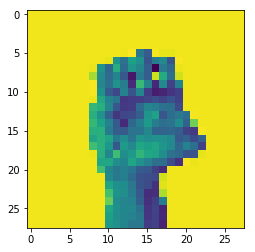

In [145]:
b = X_test[500]
print(y_test[500])
a = cv2.imread('e.jpg')
a = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
a = cv2.resize(a,(28,28))
b = np.reshape(b,(28,28))
print(b.size)
plt.imshow(a)
a = np.reshape(b,(1,28,28,1))

In [146]:
model.predict_classes(a)

array([1])

In [137]:
from sklearn.metrics import confusion_matrix,classification_report

In [138]:
predicts = model.predict_classes(X_test_use)

In [143]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       331
           1       1.00      0.97      0.98       432
           2       0.95      1.00      0.98       310
           3       0.92      1.00      0.96       245
           4       1.00      0.98      0.99       498
           5       1.00      1.00      1.00       247
           6       0.93      0.94      0.93       348
           7       0.99      0.95      0.97       436
           8       0.95      0.93      0.94       288
          10       0.88      0.94      0.91       331
          11       0.91      1.00      0.95       209
          12       0.89      0.95      0.92       394
          13       1.00      0.63      0.77       291
          14       1.00      0.91      0.96       246
          15       0.95      1.00      0.97       347
          16       0.98      1.00      0.99       164
          17       0.94      1.00      0.97       144
          18       0.89    

In [144]:
print(confusion_matrix(y_test,predicts))

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 418   0   0   0   0   0   0  13   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  3   0   0   0 490   0   0   0   0   0   0   0   0   0   0   0   0   5
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 328   0   0   0   0   0   0   0  20   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  23 413   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 267   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  21]
 [  0   0   0   0   0   0   0   0   0 310   0   0   0   0   0   0   0   5
    0   0   0   0